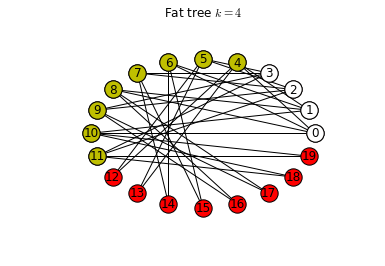

In [20]:
% matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
class FatTree(object):
    def __init__(self,k):
        self.k = k
        self.topo = nx.Graph()
        self.num_core_switch = k**2/4
        self.num_aggregation_switch = k**2/2
        self.num_edge_switch = k**2/2
        self.core_switches = [i for i in range(0,k**2/4)]
        self.aggregation_switches = [i for i in range(k**2/4,3*(k**2)/4)]
        self.edge_switches = [i for i in range(3*(k**2)/4,5*(k**2)/4)]
        self.generateTopo()
    def generateTopo(self):
        # connect aggregation switches with core switchees
        k = self.k
        for i in range(self.k):
            for sw in range(k**2/4+k/2*i,k**2/4+k/2*(i+1)):
                sw_in_pod = sw%(k/2)
                for core_switch in range(k/2*sw_in_pod,k/2*(sw_in_pod+1)):
                    self.topo.add_edge(sw,core_switch)
        # connect aggregation switches with edge switches
        for i in range(self.k):
            for agg_switch in range(k**2/4+k/2*i,k**2/4+k/2*(i+1)):
                for edge_switch in range(3*k*k/4+k/2*i,3*k*k/4+(k/2)*(i+1)):
                    self.topo.add_edge(agg_switch,edge_switch)
    def show(self):
        pos = nx.circular_layout(self.topo)
        nx.draw_networkx(self.topo,pos,nodesize=100)
        nx.draw_networkx_nodes(self.topo,pos,self.core_switches,node_color='w')
        nx.draw_networkx_nodes(self.topo,pos,self.aggregation_switches,node_color='y')
        plt.title(r"Fat tree $k = {}$".format(self.k))
        plt.axis('off')
        plt.show()

# ft = FatTree(4)
# ft.show()
    
